In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
from calicropyield.loader import DataDownloader

In [3]:
downloader = DataDownloader(
    target_dir="../data",
)

In [4]:
downloader.download_Soil(
    county_names = ['Fresno'], 
    variables = None,
    geometry = None,)

⬇️ Downloading Fresno_soil.nc


Downloading...
From (original): https://drive.google.com/uc?id=1KBmlbDeGK61ZtWz9I421FdZdJQtVE4KU
From (redirected): https://drive.google.com/uc?id=1KBmlbDeGK61ZtWz9I421FdZdJQtVE4KU&confirm=t&uuid=f099ec88-9ec3-41cc-aaee-3309d8e71c2a
To: /home/hkaman/Documents/california-crop-yield-benchmark/data/counties/Fresno/data/soil/Fresno_soil.nc
100%|██████████| 966M/966M [00:09<00:00, 101MB/s]  


In [9]:
import matplotlib.pyplot as plt
def plot_soil_vars(soil_ds):
    """
    Plots selected soil attributes from an xarray.Dataset.
    
    Parameters:
    - soil_ds: xarray.Dataset with variables including:
      ['aws0100wta', 'slopegraddcp', 'awmmfpwwta', 'drclassdcd', 'hydgrpdcd']
    """
    soil_attributes = [
        "aws0100wta", "slopegraddcp", "awmmfpwwta", "drclassdcd", "hydgrpdcd"
    ]
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 3), facecolor='white')

    for i, var in enumerate(soil_attributes):
        ax = axes[i]
        if var in soil_ds:

            data = soil_ds[var]
            im = ax.imshow(data.values, cmap='viridis', aspect='auto')
            ax.set_title(var)
            ax.axis("off")
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        else:
            ax.set_title(f"{var} (missing)")
            ax.axis("off")

    plt.tight_layout()
    plt.show()

In [10]:
import xarray 
attribute_matrix = xarray.open_dataset('../data/counties/Fresno/data/soil/Fresno_soil.nc')
attribute_matrix

<xarray.Dataset> Size: 966MB
Dimensions:       (x: 7615, y: 6345)
Coordinates:
  * x             (x) float64 61kB 6.858e+05 6.859e+05 ... 9.143e+05 9.143e+05
  * y             (y) float64 51kB 4.167e+06 4.167e+06 ... 3.977e+06 3.977e+06
Data variables:
    aws0100wta    (y, x) float32 193MB ...
    slopegraddcp  (y, x) float32 193MB ...
    awmmfpwwta    (y, x) float32 193MB ...
    drclassdcd    (y, x) float32 193MB ...
    hydgrpdcd     (y, x) float32 193MB ...
Attributes:
    county:      Fresno
    crs:         EPSG:32610
    source:      SSURGO Soil Data - spatial + tabular merged
    resolution:  30m x 30m

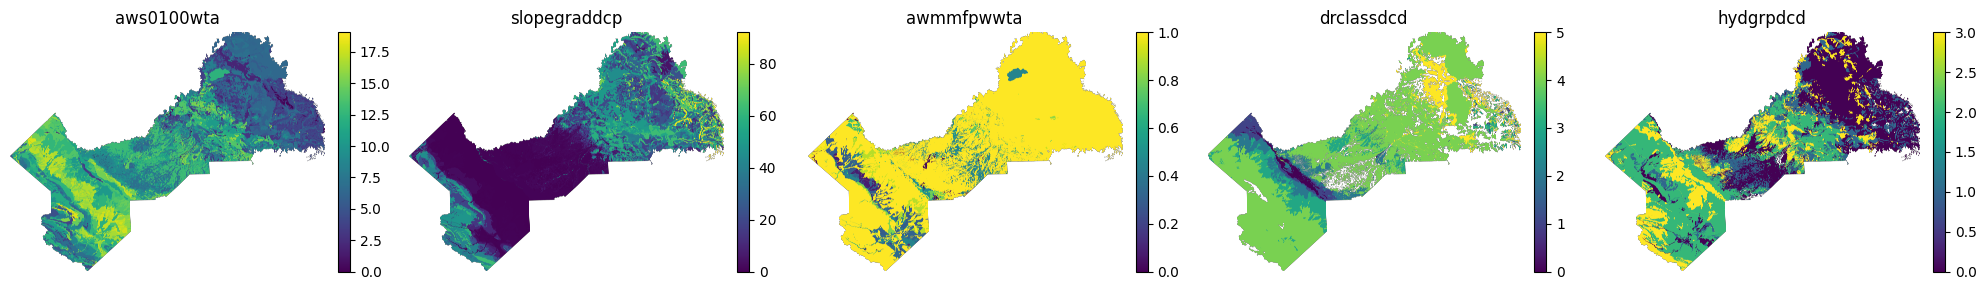

In [11]:
plot_soil_vars(attribute_matrix)